# Date fruit and Pumpkin seed dataset

# Techniques
In this code-along exercise, we will cover the following data processing techniques:
- Basic data views
- Renaming columns with `df.rename()`
- Filtering, viewing subsets with `df.loc[]`
- Sorting with `df.sort()`
- Merges with `pd.join` or `df.merge`
- Removing outliers with custom functions
- Normalization 

[Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html)

# Imports
By convention, we use the `as` in the import statement to alias `numpy` to `np`. Similarly, we alias `pandas` to `pd`. Another convention we will use is calling Pandas DataFrame objects `df`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
The [Pumpkin seeds dataset](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) and the [Date fruits datset](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets) features were derived from automated analysis of the respective foods. 

In this section, we are going to prepare the date fruits dataset to match the format of the pumpkin seeds dataset so that we could train a machine learning model to distinguish between the two.
- Learn about basic DataFrame manipulation
- Clean up the features to prepare them for use in a machine learning algorithm

In [2]:
df = pd.read_csv("/Users/trevoryu/Code/data/bdpp_data/date_fruits.csv")

# DataFrame basics

To view the first `n` lines of a DataFrame, we can use `df.head(n)`. By default, `n = 5`. Similarly, to view the last `n` lines, we can use `df.tail(n)`. 

In the Jupyter Notebook, the last line of each cell executed prints to the notebook. Simply writing `df` as the last line in a cell will print out an abridged version of the DataFrame.

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
df.tail(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
888,242092,1875.0250,700.3940,441.3842,0.7764,555.1946,0.9930,243806,0.7163,1.5868,...,2.1165,2.3162,2.4141,-1.996998e+10,-17911033856,-13709812736,41.1247,38.6405,36.6200,SOGAY
889,221306,1836.3361,698.2211,425.5484,0.7928,530.8254,0.9553,231671,0.7183,1.6408,...,2.6661,3.1736,3.2167,-1.834839e+10,-16514717696,-14801415168,44.4139,42.2057,40.7459,SOGAY
890,346353,2324.4900,840.6997,527.3477,0.7788,664.0710,0.9758,354954,0.6792,1.5942,...,2.4594,2.3749,3.1157,-3.298575e+10,-23318945792,-21721085952,47.5775,40.4490,40.0897,SOGAY
891,283636,2036.3490,751.8530,482.4856,0.7669,600.9464,0.9819,288870,0.7005,1.5583,...,2.1874,2.0473,2.8280,-2.682147e+10,-23290361856,-16920019968,46.8981,44.2381,38.6353,SOGAY
892,313194,2095.9231,769.1030,519.8459,0.7370,631.4832,0.9905,316201,0.7231,1.4795,...,2.1584,2.1710,2.3135,-2.876925e+10,-24705204224,-23276603392,47.2951,43.8257,43.2458,SOGAY
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,...,2.5138,3.0369,3.0865,-3.198348e+10,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


In [5]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


Note that the Jupyter Notebook also prints out the number of rows and columns of the DataFrame when we just let it autoprint the DataFrame. We can calso view the shape of the DataFrame using `df.shape`. By convention, the first number in the tuple is the number of rows and the second number is the number of columns.

In [6]:
df.shape

(898, 35)

We can access the index and column axes of the DataFrame with `df.index` and `df.columns` respectively. The values of the DataFrame can be access with `df.values` which returns a numpy array.

In [7]:
df.index

RangeIndex(start=0, stop=898, step=1)

In [8]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [9]:
df.values

array([[422163, 2378.908, 837.8484, ..., 54.9554, 47.84, 'BERHI'],
       [338136, 2085.144, 723.8198, ..., 52.8168, 47.8315, 'BERHI'],
       [526843, 2647.394, 940.7379, ..., 59.286, 51.9378, 'BERHI'],
       ...,
       [254330, 1926.736, 747.4943, ..., 40.7986, 40.9769, 'SOGAY'],
       [238955, 1906.2679, 716.6485, ..., 45.7162, 45.626, 'SOGAY'],
       [343792, 2289.272, 823.8438, ..., 38.6966, 39.6738, 'SOGAY']],
      dtype=object)

Other conventions
- Specify one column with `"column name"`, specify multiple columns with `["list", "of", "column", "names"]`
- Index (`axis=0`) contains a unique identifier for each of the rows; Columns (`axis=1`) contain a unique identifier for each of the columns
- Most operations default to applying to the Index axis. It's best practice to specify the axis directly for clairty.

# Renaming Columns
Analyzing the column names, we notice a few things about the dataset. 

Of benefit:
1. Both datasets use many of the same features
2. Both datasets use the underscores to delimit words in the column names

Of concern:
1. Both datasets use different capitalization 
2. The feature of "equivalent diameter" in the pumpkin seeds to be "equivalent diameter squared" in the date fruits
3. The major and minor axis features are missing the word "length" for the data fruits


In [10]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [11]:
pumpkin_seed_features = [
    'area',
    'perimeter',
    'major_axis_length',
    'minor_axis_length',
    'convex_area',
    'equiv_diameter',
    'eccentricity',
    'solidity',
    'extent',
    'roundness',
    'aspect_ratio',
    'compactness',
    'class'
]


In this section, we will deal with these concerns by renaming the columns using `df.rename()` and taking the square root of the `EQDIASQ` feature.

`df.rename()` has two forms:
- `df.rename(mapper=function, axis="columns")` where we specify a function that is applied to all the column names. The function should result in all unique outputs when applied to all column names.
- `df.rename(mapper=Dict, axis="columns")` where we would specify a dictionary with keys as the old column names and values as the new column names. The columns to rename do not have to exist in the DataFrame; any keys in the dict that are not present will have no effect on the DataFrame and no error will be raised.

To deal with the capitalization, we will apply a function that transforms the string into all lowercase. To deal with the different names, we will make a dictionary that maps the lower-case incorrect names to correct ones.

In [12]:
mapper_function = lambda x: x.lower()

mapper_dict = {
    "eqdiasq": "equiv_diameter",
    "major_axis": "major_axis_length",
    "minor_axis": "minor_axis_length"
}

df = df.rename(mapper=mapper_function, axis="columns")
df = df.rename(mapper=mapper_dict, axis="columns")
df.head()

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# Viewing subsets
Just selecting data from a dataframe will not apply the operation to the dataframe, unless we assign it to a variable.

To view just a single columns, we can index the dataframe with that column name. Note that a single column will be returned as a `Series` object, which is similar to a dataframe, but with just one column. Therefore, some operations cannot be applied as with dataframes.

In [13]:
# Select the area column
df["area"]

0      422163
1      338136
2      526843
3      416063
4      347562
        ...  
893    255403
894    365924
895    254330
896    238955
897    343792
Name: area, Length: 898, dtype: int64

To view multiple columns, pass in a list of column names. When multiple columns are selected, a `DataFrame` is returned.

In [14]:
# View the area and perimieter columns
df[["area", "perimeter"]]

,area,perimeter
0,422163,2378.9080
1,338136,2085.1440
2,526843,2647.3940
3,416063,2351.2100
4,347562,2160.3540
...,...,...
893,255403,1925.3650
894,365924,2664.8230
895,254330,1926.7360
896,238955,1906.2679


There are two ways to select rows. If you know the row index or indicies, you can use `df.iloc[i]` or `df.iloc[[i, j, k]]` to select those rows.

If you know a condition on the values, you should use `df.loc[index_mask, columns]`. `index_mask` Boolean mask is a `(n,)` sized array of `True` or `False` values, while `columns` is a list of the columns. If `columns` are not specified, it will be assumed that all columns are selected, while rows will be filtered according to `index_mask`.

The mask can be made from taking a Series and applying a Boolean logic operator to it. For example, 
`mask = df[col] == value`. Multiple masks can be combined with AND (`&`) and OR (`|`) elementwise operators, with mask expressions in brackets.

In [15]:
# Select rows 1, 3, and 5
df.iloc[[1, 3, 5]]

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,class
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-4.114037e+10,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI


In [16]:
# View the area and perimeter of BERHI date fruits whose area is greater than 500_000
mask = (df["class"] == "BERHI") & (df["area"] > 500_000)
df.loc[mask, ["area", "perimeter", "class"]]

,area,perimeter,class
2,526843,2647.3940,BERHI
8,546063,2714.9480,BERHI
64,500669,2580.3069,BERHI


We can sort a dataframe by the values in a specific column using `df.sort_values(by=column_name)`. By default, sorting is by ascending order, so specifying `ascending=False` will sort in descending order.

In [17]:
# Sort large BERHI dates by perimeter in descending order
subdf = df.loc[mask, ["area", "perimeter"]]
subdf.sort_values(by="perimeter", ascending=False)

,area,perimeter
8,546063,2714.9480
2,526843,2647.3940
64,500669,2580.3069


Now that the column names are normalized and we know how to select specific columns, we can select the same subset of columns that the pumpkin seeds dataset has.

We could drop the unwanted columns one-by-one using `df.drop(labels=["column", "names"], axis=1)`. Some operations can also be applied to the same object by specifing the keyword `inplace=True`. By default, `inplace=False`, so changes will not be applied. Here, we will drop the unwanted columns `["meanrr", "meanrg", "meanrb"]` in place.

In [19]:
df.drop(labels=["meanrr", "meanrg", "meanrb"], axis=1, inplace=True)
df.head()

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


However, since we know the columns we want to keep, we could just select them and assign the result to `df` to keep them.

In [ ]:
df = df[pumpkin_seed_features]
df.head()

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,label
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,date_fruit
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,date_fruit
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,date_fruit
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,date_fruit
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,date_fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,date_fruit
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,date_fruit
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,date_fruit
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,date_fruit


# Feature normalization

As discussed earlier, machine learning models require their inputs to be in vectors. Additionally, a lot of ML models assume that the input data is roughly normally distributed with 0 mean and unit standard deviation, or that the data is scaled between [-1, 1]. By preparing data to have a standard normal distribution generally improves model performance compared to having un-normalized features.

Scikit-learn has a handy interface to apply common normalization techniques like standard scaling and min-max scaling to dataframes.

We only apply this normalization to the feature columns, e.g. not the `class` column. Later, we will talk about how to encode categorical variables like `class` for ML models.

In [21]:
feature_cols = df.columns.drop("class")
X_df = df[feature_cols]

In [22]:
scaler = StandardScaler().set_output(transform="pandas")
X_df_trans = scaler.fit_transform(X_df)

We can see that the mean and standard deviation of the features are now 0 and 1 respectively.

In [24]:
X_df_trans.agg(["mean", "std"]).round(3)

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,skewrb,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


In [25]:
df[df["eccentricity"] < 0.6]

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,class
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-9.526242e+10,-79321833472,-69569445888,64.6188,59.9127,55.6509,BERHI
12,407789,2308.4099,788.7270,664.5451,0.5386,720.5644,0.9958,409514,0.7594,1.1869,...,3.4429,4.0735,5.4770,-3.400265e+10,-37003776000,-35555409920,45.1644,47.5129,45.3586,BERHI
13,340451,2098.1631,724.4111,600.3284,0.5597,658.3887,0.9971,341437,0.7813,1.2067,...,2.4762,2.7434,4.2934,-4.036631e+10,-34643922944,-24675141632,53.6975,50.2603,41.2631,BERHI
17,396792,2291.0701,790.0845,644.6891,0.5781,710.7822,0.9967,398109,0.7372,1.2255,...,2.8394,4.4264,8.6120,-2.654048e+10,-27549376512,-24806567936,40.8092,42.3958,39.7497,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,363000,2213.5681,758.2262,614.7969,0.5853,679.8426,0.9899,366699,0.7570,1.2333,...,2.6258,3.0260,3.2979,-4.686341e+10,-43662589952,-40965390336,56.5582,54.8980,53.4013,ROTANA
584,393597,2314.4861,786.8590,640.9199,0.5801,707.9147,0.9898,397668,0.7909,1.2277,...,1.9050,1.8690,2.0937,-5.023791e+10,-44940599296,-35621457920,53.8075,51.5197,46.2576,ROTANA
588,466516,2517.9890,859.3656,695.9106,0.5867,770.7053,0.9917,470414,0.8090,1.2349,...,3.3115,2.8606,2.8552,-9.492853e+10,-79873327104,-74678779904,69.8811,65.0292,62.7475,ROTANA
596,339538,2261.2610,727.2855,607.8656,0.5490,657.5053,0.9815,345936,0.7100,1.1965,...,2.4683,2.5653,3.5945,-5.598112e+10,-53872259072,-57938898944,63.0610,62.2550,64.7377,ROTANA


# Outlier removal

We'll compute a robust Z-score using $z' = \frac{x - \tilde{x}}{1.4826 \times \text{MAD}(x)}$ where $\tilde{x}$ is the median of $x$, MAD is the median absolute deviation, and 1.4826 is a scale factor so that the MAD approximates the standard deviation of a normal distribution. 

We will reject outliers as having a robust Z-score of $|z| > 3$.

In [ ]:
import matplotlib.pyplot as plt

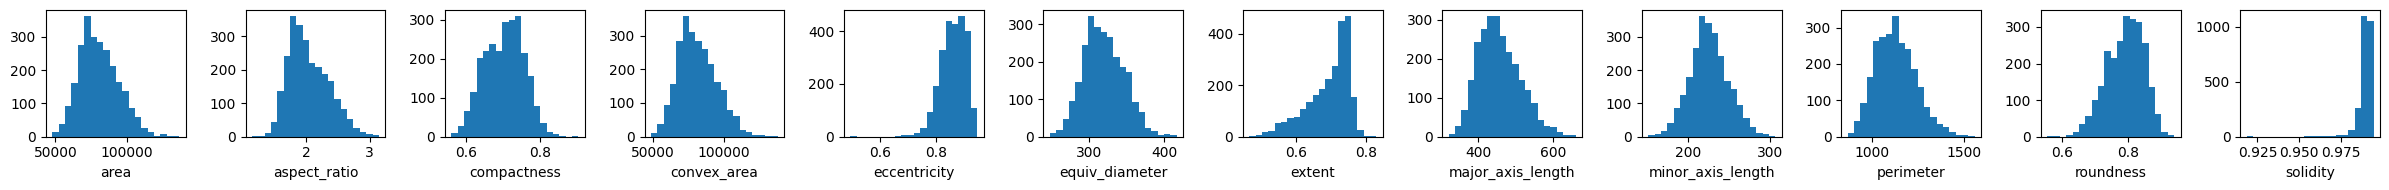

In [ ]:
fig, axs = plt.subplots(1, len(feature_cols), figsize=(24, 2))

for col, ax in zip(feature_cols, axs):
    ax.hist(dfp[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import median_abs_deviation as mad

In [ ]:
df_score = dfd.copy(deep=True)

In [ ]:
df_stats = dfd[feature_cols].agg([np.median, mad])
df_stats

,area,aspect_ratio,compactness,convex_area,eccentricity,equiv_diameter,extent,major_axis_length,minor_axis_length,perimeter,roundness,solidity
median,319833.0,1.52415,0.80495,327207.0,0.7547,638.14095,0.74695,791.3634,495.05485,2196.34545,0.86775,0.9873
median_abs_deviation,81801.5,0.15075,0.03995,81918.5,0.0559,80.22815,0.03395,91.4002,93.74330,250.86500,0.03450,0.0054


In [ ]:
for col in feature_cols:
    median = df_stats.loc["median", col]
    mad = df_stats.loc["median_abs_deviation", col]
    func = lambda x: (x - median) / (1.4826 * mad)
    df_score[col] = df_score[col].apply(func)

In [ ]:
df_score

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,equiv_diameter,solidity,convex_area,extent,aspect_ratio,...,kurtosisrr,kurtosisrg,kurtosisrb,entropyrr,entropyrg,entropyrb,alldaub4rr,alldaub4rg,alldaub4rb,label
0,0.843758,0.490849,0.343038,1.083683,-1.416551,0.798789,0.924302,0.800487,0.718199,-1.013638,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,date_fruit
1,0.150917,-0.298983,-0.498440,0.720605,-2.240661,0.151375,1.261548,0.097215,0.646677,-1.378288,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,date_fruit
2,1.706892,1.212716,1.102314,1.585141,-1.270552,1.520697,1.111661,1.660478,0.372510,-0.935786,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,date_fruit
3,0.793460,0.416378,0.270216,1.081018,-1.545658,0.754096,0.936793,0.749660,0.575155,-1.078514,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,date_fruit
4,0.228638,-0.096769,-0.202020,0.631592,-1.305544,0.227734,0.437170,0.194233,0.197678,-0.954578,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,date_fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.531255,-0.728574,-0.734397,-0.128614,-0.369220,-0.570740,-1.099170,-0.544897,-0.398337,-0.332212,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,date_fruit
894,0.380041,1.259577,0.473027,0.406449,0.117040,0.373566,-5.083662,0.488743,-1.538713,0.120133,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,date_fruit
895,-0.540102,-0.724888,-0.323733,-0.427625,0.698623,-0.580821,0.649510,-0.584196,-0.455952,0.857934,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,date_fruit
896,-0.666876,-0.779920,-0.551361,-0.382959,0.393352,-0.727682,-3.359963,-0.645619,-1.024153,0.437804,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,date_fruit


In [ ]:
mask = (df_score[feature_cols] > 3) | (df_score[feature_cols] < -3)
mask.sum(axis="rows")

area                  0
aspect_ratio          9
compactness           1
convex_area           0
eccentricity         16
equiv_diameter        2
extent               11
major_axis_length    10
minor_axis_length     1
perimeter             8
roundness            30
solidity             77
dtype: int64

In [ ]:
mask.max(axis="columns").sum()

122